In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualisation and plotting
import matplotlib.pyplot as plt # data plotting
import warnings
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris



In [6]:
df=pd.read_csv("/content/IRIS.csv")

In [7]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [13]:
rows, col = df.shape
print("Rows : %s, column : %s" % (rows, col))

Rows : 150, column : 5


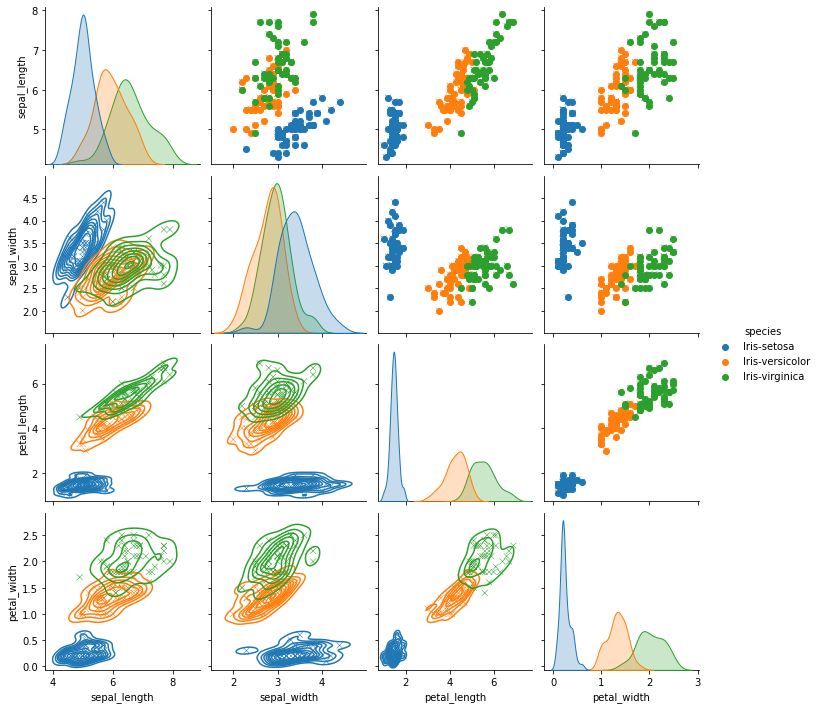

In [15]:

g = sns.pairplot(df, hue='species', markers='x')
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)

In [16]:
y= df['species']
X = df.drop('species', axis=1)

In [17]:
X.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
mapping = {
    'Iris-setosa' : 1,
    'Iris-versicolor' : 2,
    'Iris-virginica' : 3
}

X = df.drop(['species'], axis=1).values # Input Feature Values
y = df.species.replace(mapping).values.reshape(rows,1) # Output values

X = np.hstack(((np.ones((rows,1))), X))# Adding one more column for bias

In [48]:
y.shape

(150, 1)

In [36]:
def computeCost(X, y, theta):
    inner_product = (np.dot(X, theta.T) - y) ** 2
    return np.sum(inner_product) / (2 * len(X))

In [80]:
np.random.seed(0) # Let's set the zero for time being
theta = np.random.randn(5,1) # Setting values of theta randomly

print("Theta : %s" % (theta))

Theta : [[1.76405235]
 [0.40015721]
 [0.97873798]
 [2.2408932 ]
 [1.86755799]]


In [30]:
theta.shape

(1, 5)

In [40]:
theta.ravel()

array([1.76405235, 0.40015721, 0.97873798, 2.2408932 , 1.86755799])

In [29]:
X.shape

(150, 5)

In [81]:
def compute_cost(X, y, theta):
  """
  Compute the cost of a particular choice of theta for linear regression.

  Input Parameters
  ----------------
  X : 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
      m= number of training examples
      n= number of features (including X_0 column of ones)
  y : 1D array of labels/target value for each traing example. dimension(1 x m)

  theta : 1D array of fitting parameters or weights. Dimension (1 x n)

  Output Parameters
  -----------------
  J : Scalar value.
  """
  predictions = X.dot(theta)
  #print('predictions= ', predictions[:5])
  errors = np.subtract(predictions, y)
  #print('errors= ', errors[:5]) 
  sqrErrors = np.square(errors)
  #print('sqrErrors= ', sqrErrors[:5]) 
  #J = 1 / (2 * m) * np.sum(sqrErrors)
  # OR
  # We can merge 'square' and 'sum' into one by taking the transpose of matrix 'errors' and taking dot product with itself
  # If your confuse about this try to do this with few values for better understanding  
  J = 1/(2 * rows) * errors.T.dot(errors)

  return J

In [82]:
def gradient_descent(X, y, theta, alpha, iterations):
  """
  Compute cost for linear regression.

  Input Parameters
  ----------------
  X : 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
      m= number of training examples
      n= number of features (including X_0 column of ones)
  y : 1D array of labels/target value for each traing example. dimension(m x 1)
  theta : 1D array of fitting parameters or weights. Dimension (1 x n)
  alpha : Learning rate. Scalar value
  iterations: No of iterations. Scalar value. 

  Output Parameters
  -----------------
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
  cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
  """
  cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X.dot(theta)
    #print('predictions= ', predictions[:5])
    errors = np.subtract(predictions, y)
    #print('errors= ', errors[:5])
    sum_delta = (alpha / rows) * X.transpose().dot(errors);
    #print('sum_delta= ', sum_delta[:5])
    theta = theta - sum_delta;

    cost_history[i] = compute_cost(X, y, theta)  

    return theta, cost_history

In [83]:
#theta = np.zeros(5)
iterations = 1000;
alpha = 0.01

In [84]:
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('First 5 values from cost_history =', cost_history[:5])
print('Last 5 values from cost_history =', cost_history[-5 :])

Final value of theta = [[ 1.60652514]
 [-0.5553379 ]
 [ 0.50384805]
 [ 1.56714528]
 [ 1.64410637]]
First 5 values from cost_history = [20.30292341  0.          0.          0.          0.        ]
Last 5 values from cost_history = [0. 0. 0. 0. 0.]


In [92]:
 prediction = np.round(np.dot(x_train, theta))

In [96]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_error
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=1/2,random_state=0)

for i in range(2,10):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=1/2,random_state=42)
    theta, cost_history = gradient_descent(x_train, y_train, theta, alpha, iterations)
    prediction = np.round(np.dot(x_test, theta))
    lin_mae = mean_absolute_error(y_test, prediction)
    print(lin_mae)
    print("cross validation score for %d comparisions: %0.2f (+/- %0.2f)" % (i,lin_mae.mean(), lin_mae.std() * 2))

1.04
cross validation score for 2 comparisions: 1.04 (+/- 0.00)
1.0266666666666666
cross validation score for 3 comparisions: 1.03 (+/- 0.00)
1.0266666666666666
cross validation score for 4 comparisions: 1.03 (+/- 0.00)
1.0266666666666666
cross validation score for 5 comparisions: 1.03 (+/- 0.00)
1.0
cross validation score for 6 comparisions: 1.00 (+/- 0.00)
1.0
cross validation score for 7 comparisions: 1.00 (+/- 0.00)
0.9866666666666667
cross validation score for 8 comparisions: 0.99 (+/- 0.00)
0.96
cross validation score for 9 comparisions: 0.96 (+/- 0.00)
